## Stress Testing Visualising 

In [1]:
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt 
import pandas as pd
import json
from utils import convert_size, save_json_file
import os

### Metadata information about stress test and machine resources

In [ ]:
file = open('../results/stress_test_id[1]_Psychopath_[2025-08-12_12-15-41].json')
data = json.load(file)
id = data['id']
title = data['title']
host = data['host']
frequency = data['frequency']
duration = data['duration']
cpu = data['resources']['cpu']
ram = data['resources']['ram']
cpu_metrics = data['utilization']['cpu']
ram_metrics = data['utilization']['ram']

ram_total = float(ram['total'].split(" ")[0])
print(f"ID: {id}")
print(f"Title: {title}")
print(f"Machine host: {host}")
print(f"The number of logical CPUs in the system {cpu['logical_cpus']}")
print(f"The number of physical cores in the system {cpu['physical_cores']}")
print(f"Frequency: {frequency} seconds")
print(f"Duration Time: {duration} seconds")
print(f"Total Memory {ram['total']}")

ID: 1
Title: XGBoost_Thread_Comparison
Machine host: Psychopath
The number of logical CPUs in the system 8
The number of physical cores in the system 4
Frequency: 1 seconds
Duration Time: 600 seconds
Total Memory 15.91 GB


In [13]:
cpu_pd = pd.json_normalize(cpu_metrics)
cpu_pd['timestamp'] = pd.to_datetime(cpu_pd['timestamp'], unit='s')
cpu_x = np.array(cpu_pd['timestamp'].to_numpy(), dtype='datetime64[s]')
cpu_y = cpu_pd['percent'].to_numpy()

plot_interval = int(duration / 18) + 1
print(duration)

600


### Visualize for Stress Test on CPU Utilization

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11200\3792606402.py:15: SyntaxWarning: invalid escape sequence '\s'
  folder_path = f"results\stress[{id}]"
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11200\3792606402.py:7: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(idx, y, '-')


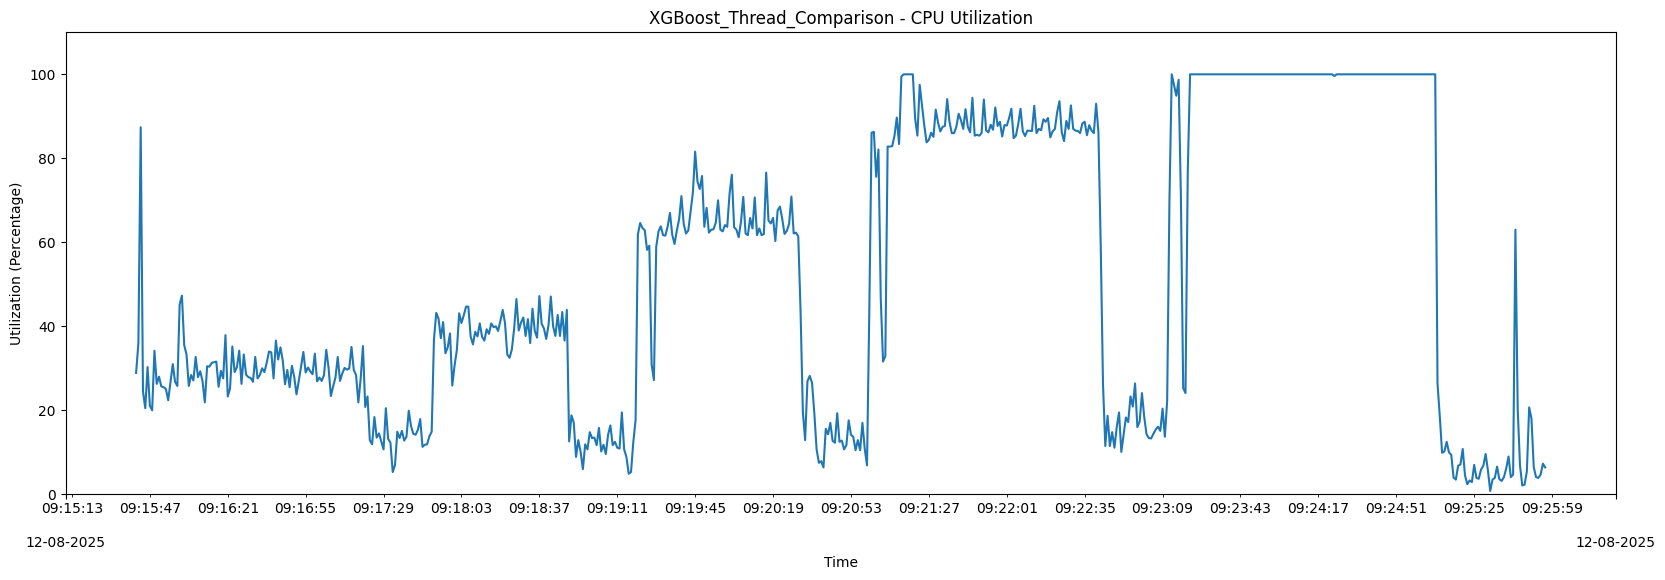

In [14]:
# plot_interval = 3
fig, ax = plt.subplots(figsize=(20,6))

idx = cpu_x
y = cpu_y

ax.plot_date(idx, y, '-')
ax.set_title(title + " - CPU Utilization")
ax.set(xlabel='Time', ylabel='Utilization (Percentage)')
ax.set_ylim([0, 110])
ax.xaxis.set_minor_locator(dates.SecondLocator(interval=plot_interval))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=plot_interval))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%d-%m-%Y'))
folder_path = f"results\stress[{id}]"
isExist = os.path.exists(os.path.join(os.getcwd(),folder_path))
if isExist == False:
    os.makedirs(folder_path)

plt.savefig(f'{folder_path}/cpu_stress.png')

In [15]:
ram_pd = pd.json_normalize(ram_metrics)
ram_pd['timestamp'] = pd.to_datetime(ram_pd['timestamp'], unit='s')
ram_x = np.array(ram_pd['timestamp'].to_numpy(), dtype='datetime64[s]')
ram_y = ram_pd['percent'].to_numpy()


### Visualize for RAM Utilization

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11200\2566574559.py:6: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax2.plot_date(idx, y, '-')


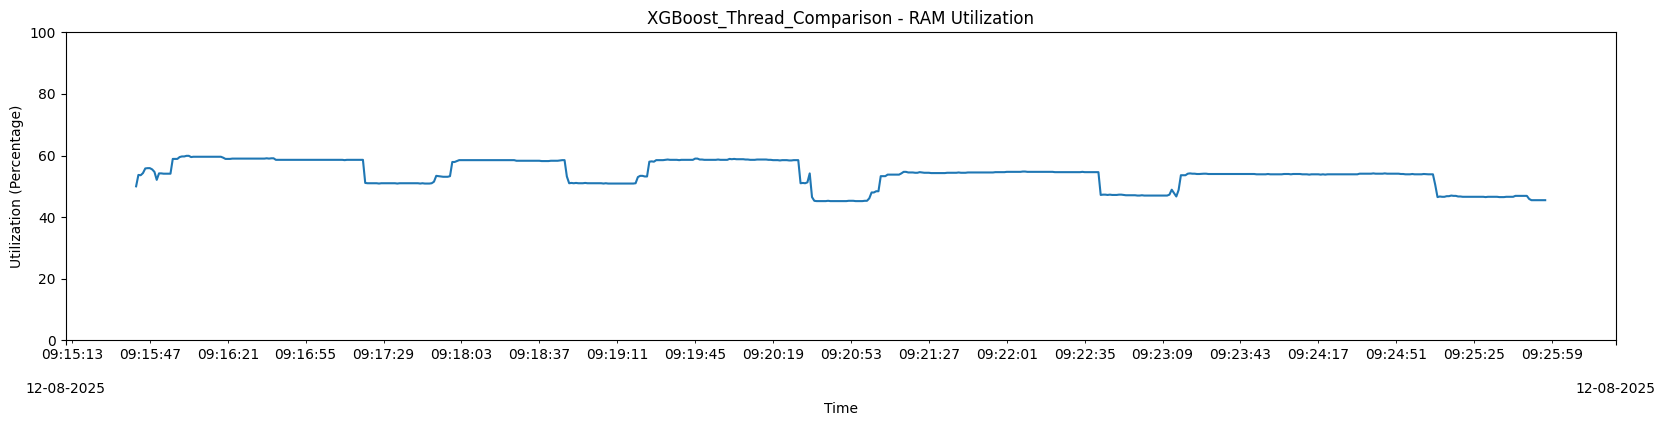

In [16]:
fig2, ax2 = plt.subplots(figsize=(20,4))

idx = ram_x
y = ram_y

ax2.plot_date(idx, y, '-')
ax2.set_title(title + " - RAM Utilization")
ax2.set(xlabel='Time', ylabel='Utilization (Percentage)')
ax2.set_ylim([0, 100])
ax2.xaxis.set_minor_locator(dates.SecondLocator(interval=plot_interval))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
ax2.xaxis.set_major_locator(dates.MinuteLocator(interval=plot_interval))
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n%d-%m-%Y'))

isExist = os.path.exists(os.path.join(os.getcwd(),folder_path))
if isExist == False:
    os.makedirs(folder_path)

plt.savefig(f'{folder_path}/ram_utilization_stress.png')

In [17]:
ram_used_pd = pd.json_normalize(ram_metrics)
ram_used_pd['timestamp'] = pd.to_datetime(ram_used_pd['timestamp'], unit='s')
ram_used_x = np.array(ram_used_pd['timestamp'].to_numpy(), dtype='datetime64[s]')
ram_used_y = ram_used_pd['used'].to_numpy()

split_size = lambda a : float(a.split(" ")[0])
convert_size_all = np.vectorize(convert_size)
split_all = np.vectorize(split_size)
ram_used_y = split_all(convert_size_all(ram_used_y))
ram_used_unit = convert_size(ram_used_pd['used'][0]).split(" ")[1]

### Visualize for RAM Used

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11200\2364433123.py:6: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax3.plot_date(idx, y, '-')


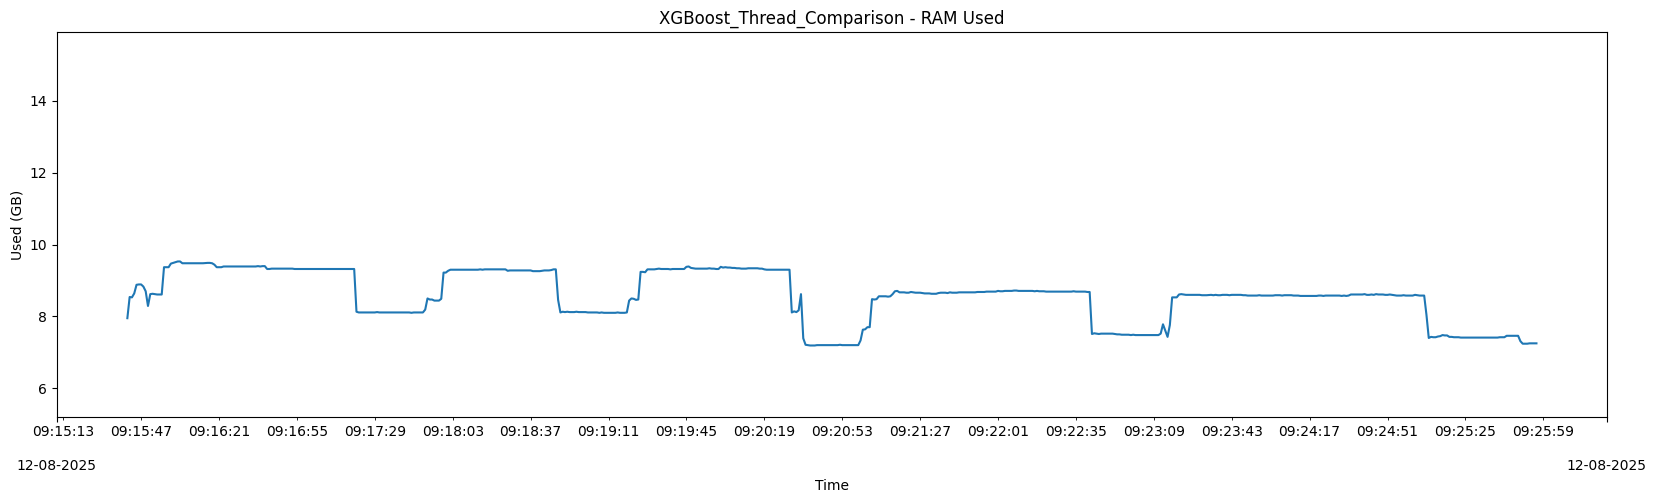

In [18]:
fig3, ax3 = plt.subplots(figsize=(20,5))

idx = ram_used_x
y = ram_used_y

ax3.plot_date(idx, y, '-')
ax3.set_title(title + " - RAM Used")
ax3.set(xlabel='Time', ylabel=f"Used ({ram_used_unit})")
ax3.set_ylim([min(y) - 2, ram_total])
ax3.xaxis.set_minor_locator(dates.SecondLocator(interval=plot_interval))
ax3.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
ax3.xaxis.set_major_locator(dates.MinuteLocator(interval=plot_interval))
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n%d-%m-%Y'))

isExist = os.path.exists(os.path.join(os.getcwd(),folder_path))
if isExist == False:
    os.makedirs(folder_path)

plt.savefig(f'{folder_path}/ram_used_stress.png')

In [19]:
ram_available_pd = pd.json_normalize(ram_metrics)
ram_available_pd['timestamp'] = pd.to_datetime(ram_used_pd['timestamp'], unit='s')
ram_available_x = np.array(ram_available_pd['timestamp'].to_numpy(), dtype='datetime64[s]')
ram_available_y = ram_available_pd['available'].to_numpy()

split_size = lambda a : float(a.split(" ")[0])
ram_available_y = split_all(convert_size_all(ram_available_y))
ram_available_unit = convert_size(ram_available_pd['available'][0]).split(" ")[1]

### Visualize for RAM Available

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11200\3925489917.py:6: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax4.plot_date(idx, y, '-')


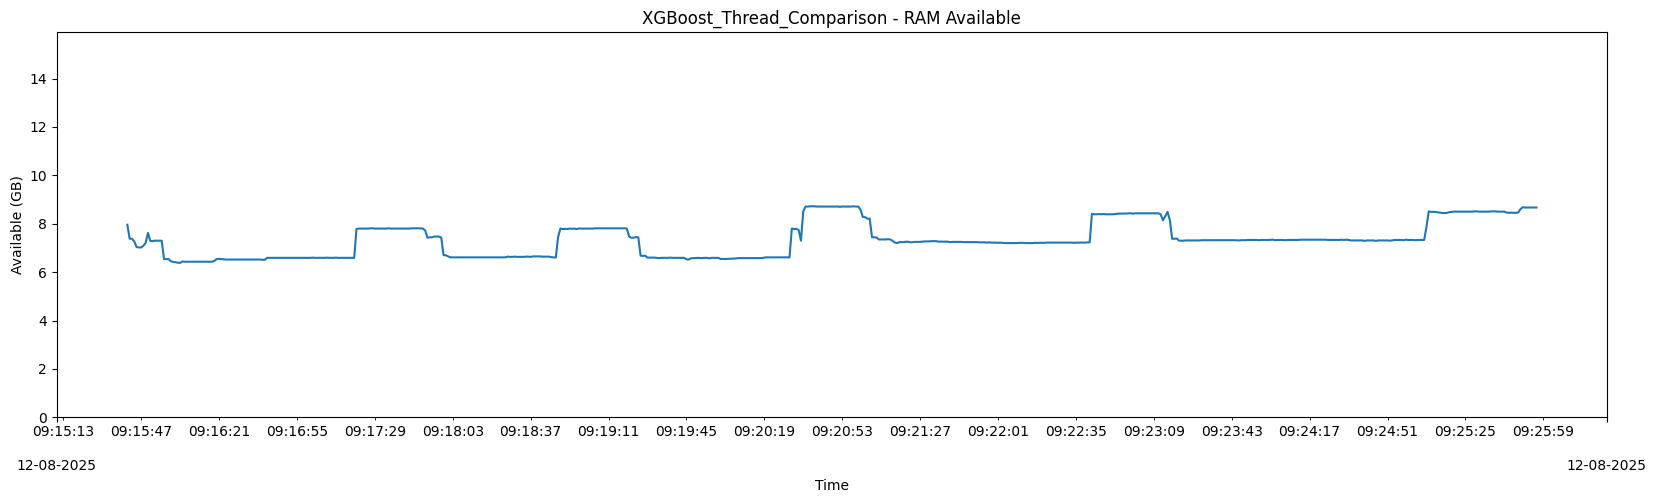

In [20]:
fig4, ax4 = plt.subplots(figsize=(20,5))

idx = ram_available_x
y = ram_available_y

ax4.plot_date(idx, y, '-')
ax4.set_title(title + " - RAM Available")
ax4.set(xlabel='Time', ylabel=f"Available ({ram_available_unit})")
ax4.set_ylim([0, ram_total])
ax4.xaxis.set_minor_locator(dates.SecondLocator(interval=plot_interval))
ax4.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
ax4.xaxis.set_major_locator(dates.MinuteLocator(interval=plot_interval))
ax4.xaxis.set_major_formatter(dates.DateFormatter('\n\n%d-%m-%Y'))

isExist = os.path.exists(os.path.join(os.getcwd(),folder_path))
if isExist == False:
    os.makedirs(folder_path)

plt.savefig(f'{folder_path}/ram_available_stress.png')

In [21]:
# convert_size(80375053)
convert_size(6972360326)
np.array([1647342455],'datetime64[s]')

array(['2022-03-15T11:07:35'], dtype='datetime64[s]')